# Face Recognition using Principal Component Analysis

### Accessing the datasets

In [215]:
dataset1 = r'C:\Users\Sanika\Desktop\Linear Algebra\dataset1'
dataset2 = r'C:\Users\Sanika\Desktop\Linear Algebra\dataset2'

### Importing the required libraries

In [216]:
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import linalg as LA
import cv2
from sklearn.preprocessing import normalize
import scipy
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot, transforms
import scipy.ndimage
from skimage import color


### We create image arrays for neutral and smiling face images

In [217]:
dir1 = os.listdir(dataset1)       #returns list containing names of entries in dataset1
dir2 = os.listdir(dataset2)       #returns list containing names of entries in dataset2

In [218]:
dir_a = [os.path.join(dataset1,i) for i in dir1 if 'a' in i] 
#accesing images with the label a(nuetral images)from first dictionary and adding them to list dir_a

dir_a.extend([os.path.join(dataset2,i) for i in dir2 if 'a' in i])
#accesing images with the label a(nuetral images) from second dictionary and adding them to list dir_a

In [219]:
dir_b = [os.path.join(dataset1,i) for i in dir1 if 'b' in i]
#accesing images with the label b(smiling images) from first dictionary and adding them to list dir_b

dir_b.extend([os.path.join(dataset2,i) for i in dir2 if 'b' in i]) 
#accesing images with the label b(smiling images) from the second dictionary and and adding them to list dir_b

In [220]:
img1A = np.zeros((193,162,190))
dir_lengtha = len(dir_a)
dir_lengtha = dir_lengtha-10     #access only 190 images of dir_a
imgarrayA = np.zeros((31266,190))
imgA = np.zeros((31266,190))
imgavgA = np.zeros((31266,))
for i in range (dir_lengtha):
    img1A[:,:,i] = mpimg.imread(dir_a[i])   #access each of 190 images from dir_a and form an array of 190 images
    imgA[:,i] = img1A[:,:,i].reshape(31266,)   # Convert NxN image to columns of N^2 stacked together (here it is 193x162 = 31266 rows and 190 such columns)
imgavgA = np.mean(imgA,axis=1)                #find the average of the images
for i in range (dir_lengtha):
    imgA[:,i] = imgA[:,i] - imgavgA          # subtract average from the image array
    imgarrayA[:,i]=imgA[:,i]                 #imgarrayA is the 'A' matrix
print('Shape of imgarrayA is : ' , imgarrayA.shape)



img1B = np.zeros((193,162,190))
dir_lengthb = len(dir_b)
dir_lengthb = dir_lengthb-10    #access only 190 images of dir_b
imgarrayB = np.zeros((31266,190))  #access each of 190 images from dir_b and form an array of 190 images
imgB = np.zeros((31266,190))
imgavgB = np.zeros((31266,))    # Convert NxN image to columns of N^2 stacked together (here it is 193x162 = 31266 rows and 190 such columns)
for i in range (dir_lengthb):
    img1B[:,:,i] = mpimg.imread(dir_b[i])
    imgB[:,i] = img1B[:,:,i].reshape(31266,)
imgavgB = np.mean(imgB,axis=1)        #find the average of the images
for i in range (dir_lengthb):
    imgB[:,i] = imgB[:,i] - imgavgB   # subtract average from the image array
    imgarrayB[:,i]=imgB[:,i]    #imgarrayB is the 'B' matrix
print('Shape of imgarrayB is : ' , imgarrayB.shape)

Shape of imgarrayA is :  (31266, 190)
Shape of imgarrayB is :  (31266, 190)


## Implementation and Experiments

## Part a - 

#### Compute the principal components (PCs) using first 190 individuals’ neutral expression  image.   Plot  the  singular  values  of  the  data  matrix  and  justify  your  choice  of principal components.

### Calculation of eigen values and eigen vectors for neutral face images

In [226]:
#A is our data matrix here

#find transpose of the A matrix
imgarrayAt = np.transpose(imgarrayA) 

#find covariance matrix of (A.transpose)
covA = imgarrayAt.dot(imgarrayA) 

print(covA.shape)


(190, 190)


In [227]:
 #find the eigenvalues and eigenvectors of covariance matrix. This gives an ascending order.
    
eigenvaluesA, eigenvectorsA = scipy.linalg.eigh(covA)


In [228]:
#printing the shape of eigen values and eigen vectors

print(eigenvaluesA.shape) 
print(eigenvectorsA.shape)


(190,)
(190, 190)


### Plotting the eigen values for neutral face images

Text(0, 0.5, 'Eigen Values for neutral faces')

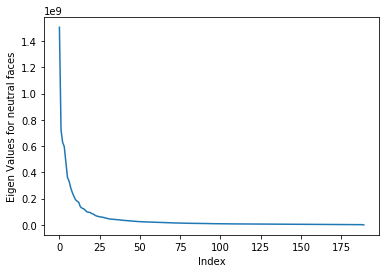

In [229]:
#eigenvalues are sorted in descending order using flip function
eigenvaluesA = np.flip(eigenvaluesA)

#eigenvectors are sorted in descending order using flip function
eigenvectorsA = np.flip(eigenvectorsA,1) 


#plot the eigenvalues

plt.plot(eigenvaluesA) 
plt.xlabel('Index') 
plt.ylabel('Eigen Values for neutral faces')


### Plotting the singular values of neutral face images

C:\Users\Sanika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Singular Values for neutral faces')

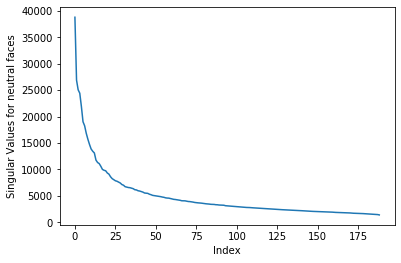

In [230]:
#singular value decomposition

singularvalues = np.sqrt(eigenvaluesA) 
plt.plot(singularvalues) 
plt.xlabel('Index') 
plt.ylabel('Singular Values for neutral faces')


### Calculation of eigen values and eigen vectors for smiling face images

In [235]:
#B is our data matrix here

#find transpose of the B matrix 
imgarrayBt = np.transpose(imgarrayB)

#find the covariance matrix of B.transpose
covB = imgarrayBt.dot(imgarrayB)

print(covB.shape)

(190, 190)


In [236]:
eigenvaluesB, eigenvectorsB = scipy.linalg.eigh(covB)

print(eigenvaluesB.shape)
print(eigenvectorsB.shape)

(190,)
(190, 190)


### Plotting the eigen values for smiling face images

Text(0, 0.5, 'Eigen Values for smiling faces')

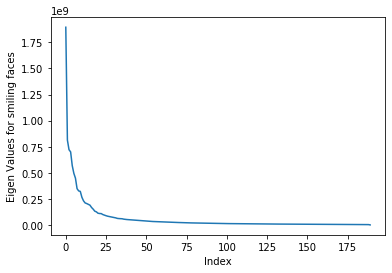

In [237]:
#flip function is used to sort eigenvalues
eigenvaluesB = np.flip(eigenvaluesB)

#flip function is used to sort eigenvectors
eigenvectorsB = np.flip(eigenvectorsB,1)

#plot the eigenvalues
plt.plot(eigenvaluesB)
plt.xlabel('Index')
plt.ylabel('Eigen Values for smiling faces')

#The eigen values go on decreasing 

### Plotting the singular values for smiling face images

Text(0, 0.5, 'Singular Values for smiling faces')

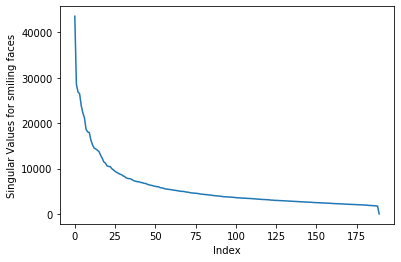

In [238]:
#singular value decomposition

singularvalues = np.sqrt(eigenvaluesB) 
plt.plot(singularvalues) 
plt.xlabel('Index') 
plt.ylabel('Singular Values for smiling faces')

### Choice of Principal components and justification

1) Principal components are the highest eigen values of the covariance matrix. 

2) The principal axes are the eigen vectors of the covariance matrix. We keep the ones which have the largest variance which means the largest eigenvalues.

3) Now, 95% of the total eigen values arranged in the descending order contribute the most in representing the feature space. We consider the highest principal components for reconstruction. Hence we consider 95% of the total number of eigen values to be the optimal number of eigen values for feature representation.


4) The number of principal components are chosen such that they cover 95 % of the variability over the data. 

5) We will keep adding the principal components starting with the highest value in the descending order and stop when the ratio is greater than 0.95 times the sum of all principal components. This is how we obtain the optimum number of principal components.


Hence , to find the optimum number of principal components : 

In [107]:
ratio = 0.0
print(eigenvaluesA.shape)
sumeig = np.sum(eigenvaluesA)
for i in range (190):
        ratio = ratio + (eigenvaluesA[i] / sumeig)
        print(ratio)
        print(i+1)
        if ratio > 0.95:
            break
        else:
            continue

(190,)
0.16233462516790204
1
0.24035890212179595
2
0.30809692468964733
3
0.3724063680154637
4
0.4241134659106558
5
0.46311955809486516
6
0.49905777416147595
7
0.529637703555677
8
0.5562824646434723
9
0.5796974073218419
10
0.6004435055290449
11
0.6199061697732896
12
0.6384533155464622
13
0.6533846875151083
14
0.667171031019884
15
0.6804611453041869
16
0.6925642716037158
17
0.703353004624076
18
0.7137817350217188
19
0.7240194664410932
20
0.7333977244799883
21
0.7423425935603438
22
0.7503419166316176
23
0.7576980946244506
24
0.7646810462264702
25
0.7713290048001662
26
0.7778184240702499
27
0.7840252288812054
28
0.7899809827715661
29
0.7954768528296678
30
0.8007776624661849
31
0.8056670595919992
32
0.81043692341978
33
0.8150958433299695
34
0.8197090945259508
35
0.8241959482324078
36
0.828552408485585
37
0.8326403131050263
38
0.8366766389054561
39
0.8405085423181254
40
0.8442704926898944
41
0.8478983752451312
42
0.8514076919648413
43
0.8547124442130302
44
0.8579805761228414
45
0.86120455746

Hence , we find that the required number of principal components for covering 95% of the variability/variance is 96. 

Therefore , the optimal number of principal components in this case is 96.


#### Define average face

In [243]:
imgavgA = imgavgA.reshape(193,162)      

### Calculation and display of eigenfaces

(31266, 190)
(31266, 190)
1.0


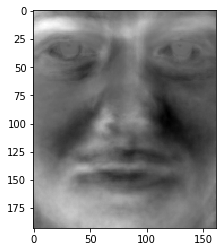

In [244]:
eigenAvnorm2A = np.zeros((193,162))
eigenAvA = np.matmul(imgarrayA,eigenvectorsA) #the eigen vectors will be A times the caluclated eigen vectors because we have calculated eigen vectors for the matrix (A.transpose) into A
print(eigenAvA.shape)


eigenAvnormA = np.zeros((31266,190))      
for j in range(eigenAvA.shape[1]):
    eigenAvnormA[:,j]= eigenAvA[:,j]/LA.norm(eigenAvA[:,j])    #normalize the new eigen vectors calculated by A into eigenvectorsA

print(eigenAvnormA.shape)

eigenAvnorm1A = eigenAvnormA[:,5]       #take a random eigenface
print(LA.norm(eigenAvnorm1A))
eigenAvnorm2A= eigenAvnorm1A.reshape(193,162)
imgplot = plt.imshow(eigenAvnorm2A, cmap='gray')  #plot the eigenface

#### Here, we have obtained an eigen face which is a ghostly representation of the eigen vectors of the covariance matrix.

## Part b

#### Reconstruct one of 190 individuals’ neutral expression image using different number of  PCs.   As  you  vary  the  number  of  PCs,  plot  the  mean  squared  error  (MSE)  of reconstruction versus the number of principal components to show the accuracy of reconstruction. Comment on your result.

### Mean squared error function

In [247]:
def mse(A,B):
    mse = np.mean(np.square(A - B)) 
    return mse   

### Using 190 Principal Components

### Finding weights

In [250]:
eigenAvnormtA = np.transpose(eigenAvnormA)   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayA[:,54])   
#multiply transpose of eigenvectors with the image from neutral faces to be reconstructed with average subtracted from it

### Reconstruction of neutral face images

MSE: 16.560087239178124


Text(0.5, 1.0, 'Original image')

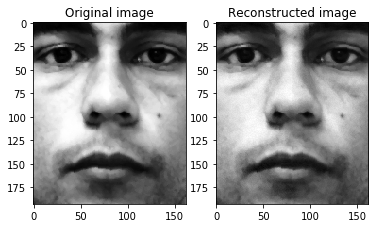

In [252]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2

reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:', mse(reconA,mpimg.imread(dir_a[54]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[54])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 140 Principal Components

### Finding weights

In [253]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:140])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayA[:,54])   
#multiply transpose of eigenvectors with the image from neutral faces to be reconstructed with average subtracted from it

### Reconstruction of neutral face images

MSE: 23.3013545158644


Text(0.5, 1.0, 'Original image')

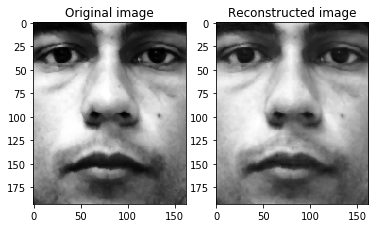

In [254]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:140],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_a[54]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[54])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 87 Principal Components

### Finding weights

In [255]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:87]) 
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayA[:,54])  
#multiply transpose of eigenvectors with the image from neutral faces to be reconstructed with average subtracted from it

### Reconstruction of neutral face images

MSE: 103.29732735277248


Text(0.5, 1.0, 'Original image')

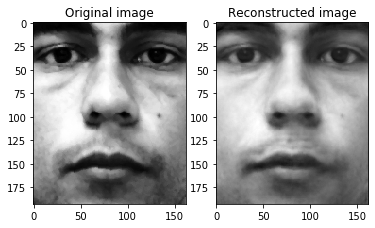

In [256]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:87],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_a[54]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[54])

fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 70 Principle Components

### Finding Weights

In [257]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:70])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayA[:,54])   
#multiply transpose of eigenvectors with the image from neutral faces to be reconstructed with average subtracted from it

### Reconstruction of neutral face images

MSE: 138.596295966327


Text(0.5, 1.0, 'Original image')

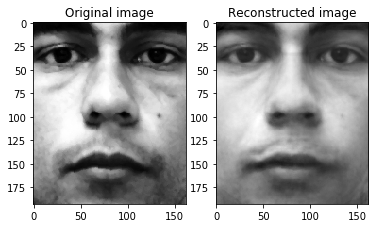

In [258]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:70],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_a[54]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[54])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 12 Principle Components

### Finding weights

In [259]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:12])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayA[:,54])   
#multiply transpose of eigenvectors with the image from neutral faces to be reconstructed with average subtracted from it

### Reconstruction of neutral face images

MSE: 574.0483874787539


Text(0.5, 1.0, 'Original image')

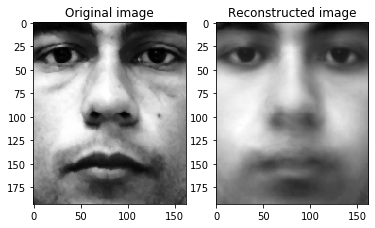

In [260]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:12],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_a[54]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[54])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Reconstruction of  one image with different number of principal components and plot MSE vs number of principal components (for neutral faces )

Text(0, 0.5, 'MSE')

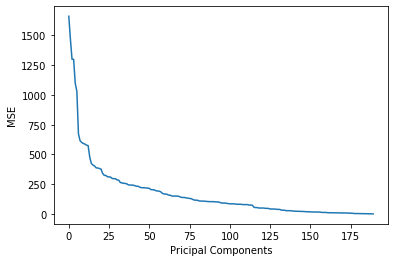

In [262]:
origimg = imgarrayA[:,54]   #take one image from the image array of neutral faces
origimg1 = origimg.reshape(31266,1) 
mselossa = np.zeros((190))
for i in range(190):   # consider i number of principal components, where i increases with each loop
    eigenAvnormtA = np.transpose(eigenAvnormA[:, :i].reshape(31266, i))   #find the transpose of the normalized eigen vectors A.v for each i in the loop
    weightA = np.matmul(eigenAvnormtA, origimg1)  #find the weights for the image to be reconstructed
    reconA = (np.matmul(np.transpose(eigenAvnormtA), weightA)) + imgavgA.reshape(31266, 1)  #find the reconstructed face 
    B = reconA.reshape(193,162)
    A = mpimg.imread(dir_a[54])
    mselossa[i] = mse(B,A)  #find the mean squared error between the reconstructed and original image for each i number of using the scikit library function
plt.plot(mselossa)  #plot the mean squared error between the reconstructed and original image

plt.xlabel('Pricipal Components')
plt.ylabel('MSE')

#### Observation

1) We observe from the graph that as the number of principal components increase fro 1 to 190, the mean squared error decreases. Hence,they are inversely proportional. The reconstruction error decreases. 

2) The mean squared error is the error between the original image and reconstructed image. Hence, as the number of principal components increase, the reconstruction of the images becomes better as the error reduces. This is because we are considering the images from the dataset which was used to find the principal components.

3) Here, we are trying to reconstruct a face that is already present in thr training data i.e. the dataset containing the neutral faces. So the mean squared error is low since it already knows the features.   

### Part c 

#### Reconstruct one of 190 individuals’ smiling expression image using different num-ber  of  PCs.   Again,  plot  the  MSE  of  reconstruction  versus  the  number  of  principalcomponents and comment on your result.

### Using 190 Principle components

### Finding weights

In [263]:
eigenAvnormtA = np.transpose(eigenAvnormA)   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayB[:,120])   
#multiply transpose of eigenvectors with the image from smiling faces to be reconstructed with average subtracted from it

### Reconstruction of smiling face images

MSE: 1340.9585535261942


Text(0.5, 1.0, 'Original image')

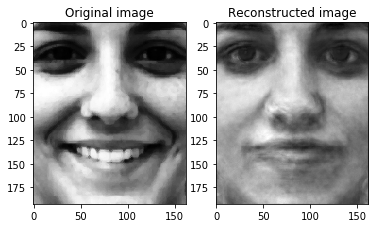

In [264]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_b[120]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_b[120])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 140 principle components

### Finding weights

In [265]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:140])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayB[:,120])   
#multiply transpose of eigenvectors with the image from smiling faces to be reconstructed with average subtracted from it

### Reconstruction of smiling face images

MSE: 1366.0590420660417


Text(0.5, 1.0, 'Original image')

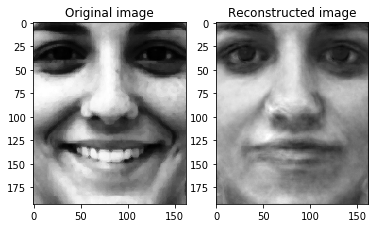

In [266]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:140],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_b[120]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_b[120])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 87 Principle components

### Finding weights

In [267]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:87])  
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayB[:,120])   
#multiply transpose of eigenvectors with the image from smiling faces to be reconstructed with average subtracted from it

### Reconstruction of smiling face images

MSE: 1403.9539064362928


Text(0.5, 1.0, 'Original image')

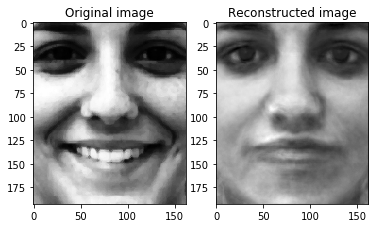

In [268]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:87],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_b[120]))) #find the mean square error between the reconstructed and original image


y = reconA
z = mpimg.imread(dir_b[120])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 70 Principle Components

### Finding weights

In [269]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:70])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayB[:,120])   
#multiply transpose of eigenvectors with the image from smiling faces to be reconstructed with average subtracted from it

### Reconstruction of smiling face images

MSE: 1460.566634394811


Text(0.5, 1.0, 'Original image')

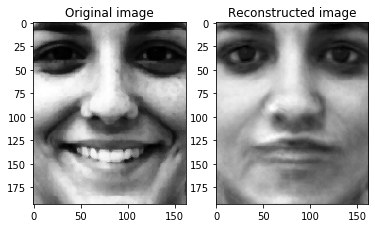

In [270]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:70],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_b[120]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_b[120])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 12 Principle components

### Finding weights

In [271]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:12])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgarrayB[:,120])   
#multiply transpose of eigenvectors with the image from smiling faces to be reconstructed with average subtracted from it

### Reconstruction of smiling face images

MSE: 2176.9079972518034


Text(0.5, 1.0, 'Original image')

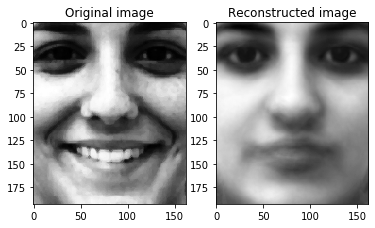

In [272]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:12],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA= reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE:' ,mse(reconA,mpimg.imread(dir_b[120]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_b[120])


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Reconstruction of one image with different number of principal components and plot MSE vs number of principal components  (for smiling faces )

Text(0, 0.5, 'MSE')

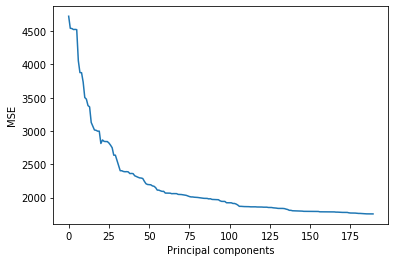

In [274]:
origimgs = imgarrayB[:,100]   #take one image from the image array of smiling faces
origimgs1 = origimgs.reshape(31266,1) 
mselossa = np.zeros((190))
for i in range(190):   # consider i number of principal components, where i increases with each loop
    eigenAvnormtA = np.transpose(eigenAvnormA[:, :i].reshape(31266, i))   #find the transpose of the normalized eigen vectors A.v for each i in the loop
    weightA = np.matmul(eigenAvnormtA, origimgs1)  #find the weights for the image to be reconstructed
    reconA = (np.matmul(np.transpose(eigenAvnormtA), weightA)) + imgavgA.reshape(31266, 1)  #find the reconstructed face 
    B = reconA.reshape(193,162)
    A = mpimg.imread(dir_b[100])
    
    mselossa[i] = mse(B,A)  #find the mean squared error between the reconstructed and original image for each i number of using the scikit library function
plt.plot(mselossa)  #plot the mean squared error between the reconstructed and original image

plt.xlabel('Principal components')
plt.ylabel('MSE')

### Observation from the result

1) We observe from the graph that as the number of principal components increase , the mean squared error decreases. Hence,they are inversely proportional.

2) The mean squared error is the error between the original image and reconstructed image. Hence, as the number of principal components increase, the reconstruction of the images becomes better because the reconstruction error reduces.

3) In this case, we are reconstructing the images using the smiling image dataset. But we have trained the model that is found the principal components  using the neutral face image dataset. Hence, we are reconstructing it on unseen data which is the smiling face data . So , in this case the model has not seen these features before. This is unseen data for the model Hence, the mean squared error is more than in case of smiling face images. 

### Part d

#### Reconstruct one of the other 10 individuals’ neutral expression image using different number of PCs. Again, plot the MSE of reconstruction versus the number of principal components and comment on your result.

### 190 Principal components

### Access one of the 10 neutral face images not considered for principal component calculations

In [277]:
imgextra = mpimg.imread(dir_a[197]) 
#take one image from the 10 neutral face images that were not considered for the computation of principal components

imgextra = imgextra.reshape(31266,) -imgavgA.reshape(31266,)

### Finding weights

In [280]:
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,imgextra)   #multiply transpose of eigenvectors with the image from 10 neutral faces that were not consider for principal components calculation but to be reconstructed with average subtracted from it

### Reconstruction of extra neutral face image

MSE : 233.66274088244822


Text(0.5, 1.0, 'Original image')

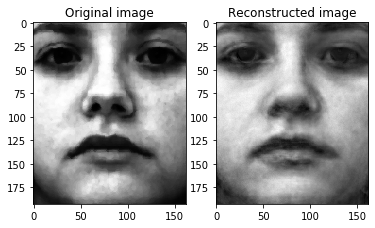

In [281]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE :' , mse(reconA,mpimg.imread(dir_a[197]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[197])
fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 140 principal components

### Finding weights

In [283]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:140])  
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgextra)  
#multiply transpose of eigenvectors with the image from 10 neutral faces that were not consider for principal components calculation but to be reconstructed with average subtracted from it

### Reconstruction of extra neutral face

MSE : 240.81250795234016


Text(0.5, 1.0, 'Original image')

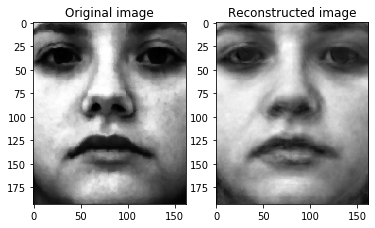

In [284]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:140],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE :' , mse(reconA,mpimg.imread(dir_a[197]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[197])

fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 87 principal components

### Finding weights

In [285]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:87])   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,imgextra)   #multiply transpose of eigenvectors with the image from 10 neutral faces that were not consider for principal components calculation but to be reconstructed with average subtracted from it

### Reconstruction of extra neutral face image

MSE : 280.53007771809706


Text(0.5, 1.0, 'Original image')

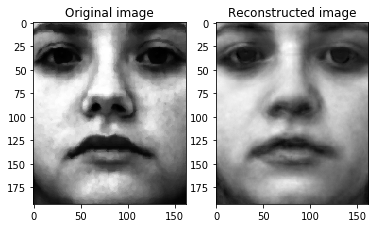

In [286]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:87],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE :' , mse(reconA,mpimg.imread(dir_a[197]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[197])

fig, axs = plt.subplots(1,2)

axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 70 principal components

### Finding weights

In [287]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:70])   
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgextra)  
#multiply transpose of eigenvectors with the image from 10 neutral faces that were not consider for principal components calculation but to be reconstructed with average subtracted from it

### Reconstruction of extra neutral face image

MSE : 304.92441180377324


Text(0.5, 1.0, 'Original image')

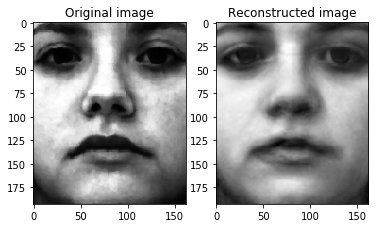

In [288]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:70],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE :' , mse(reconA,mpimg.imread(dir_a[197]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[197])
fig, axs = plt.subplots(1,2)

axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Using 12 principal components

### Finding weights

In [290]:
eigenAvnormtA = np.transpose(eigenAvnormA[:,:12])  
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,imgextra)  
#multiply transpose of eigenvectors with the image from 10 neutral faces that were not consider for principal components calculation but to be reconstructed with average subtracted from it

### Reconstruction of extra neutral face image

MSE : 619.432061380446


Text(0.5, 1.0, 'Original image')

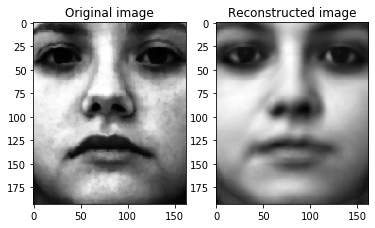

In [291]:
imgavgA = imgavgA.reshape(31266,)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA[:,:12],weightA))+imgavgA.reshape(31266,)   #reconstruct face by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed face to display it as NxN
print('MSE :' , mse(reconA,mpimg.imread(dir_a[197]))) #find the mean square error between the reconstructed and original image

y = reconA
z = mpimg.imread(dir_a[197])

fig, axs = plt.subplots(1,2)

axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Reconstruct one image with different number of principal components and plot MSE vs number of principal components

Text(0, 0.5, 'MSE')

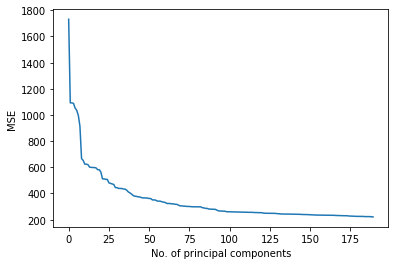

In [292]:
origimgs = imgextra   #take one image from the neutral images that have not been considered for principal componenet compuatation
origimgs1 = origimgs.reshape(31266,1) 
mselossa = np.zeros((190))
for i in range(190):   # consider i number of principal components, where i increases with each loop
    eigenAvnormtA = np.transpose(eigenAvnormA[:, :i].reshape(31266, i))   #find the transpose of the normalized eigen vectors A.v for each i in the loop
    weightA = np.matmul(eigenAvnormtA, origimgs1)  #find the weights for the image to be reconstructed
    reconA = (np.matmul(np.transpose(eigenAvnormtA), weightA)) + imgavgA.reshape(31266, 1)  #find the reconstructed face 
    B = reconA.reshape(193,162)
    A = mpimg.imread(dir_a[197])
    mselossa[i] = mse(B,A)  #find the mean squared error between the reconstructed and original image for each i number of using the scikit library function
plt.plot(mselossa)  #plot the mean squared error between the reconstructed and original image

plt.xlabel('No. of principal components')
plt.ylabel('MSE')


#### Observation from result 

1) In this case, we are trying to reconstruct the image face using the image present in the remaining 10 neutral face images that was not a part of training ( since we used only the first 190 images of the dataset1 to compute the principal components.)

2) Hence, the mean squared error in this case is less than the mean squared error obtained in part c where we used the smiling face images . 

3) But the mean square error is more than the one obtained in part b , where we reconstructed it using the neutral face images that were a part of the training model. This is seen data for the model.

4) The remaining 10 images in the model ( apart from the 190 that were used for training ) are new to the model and the model treats them as unseen data. Hence, the mean squared error ( reconstruction error) is more than when the face is reconstructed using the nuetral face images. 

5) The mean squared error decreases with increase in the number of principal components.

### Part e

#### Use any other non-human image (e.g., car image, resize and crop to the same size),and try to reconstruct it using all the PCs. Comment on your results.

In [294]:
path4 = r'C:\Users\Sanika\Desktop'
dir_4 = os.path.join(path4,'bird.jpg')   # select a random bird image


In [295]:
birdorig = mpimg.imread(dir_4)
birdgray = color.rgb2gray(birdorig)

# birdgrayn = birdgray.reshape(193,162)

birdresh = birdgray.reshape(31266,1)   # reshape to create 31266,1
birdavg = birdresh - imgavgA.reshape(31266,1)   # subtract the image average from the bird image

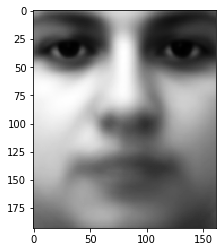

In [296]:
eigenAvnormtA = np.transpose(eigenAvnormA)
#find the transpose of the normalised eigen vectors A.v

weightA = np.matmul(eigenAvnormtA,birdavg) 
#multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA = imgavgA.reshape(193,162)     
#reshape image average to display it

plt.imshow(imgavgA, cmap='gray')                    
#display average image

MSE :  17130.175182672207


Text(0.5, 1.0, 'Original image')

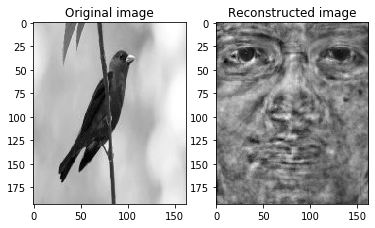

In [297]:
imgavgA = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA= reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE : ' , mse(reconA,birdgray)) #find the mean square error between the reconstructed and original image

y = reconA
z = birdgray


fig, axs = plt.subplots(1,2)
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')

### Observation from result

1) In this case , we are using an entirely different image to reconstruct the face. Since, this image is completely unseen for the model , the reconstruction obtained is a ghostly representation of the original face image.

2) Here , we have projected the image of a bird on the face space. Hence , by projecting a non-human random image on the face space, we have not been able to succesfully reconstruct the face of the person . It does not have any resemblence with the original face image .

3) The image of the bird is completely unseen for the model . Therefore, the reconstruction  error is also high and we get a high value of mean squared error. 

mse = 17130.1751



### Part f 

#### Rotate one of 190 individuals’ neutral expression image with different degrees and try to reconstruct it using all PCs. Comment on your results.

In [299]:
img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,a,reshape=False)  #rotate the image by 5 degree using scipy function
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 2226.311773815871


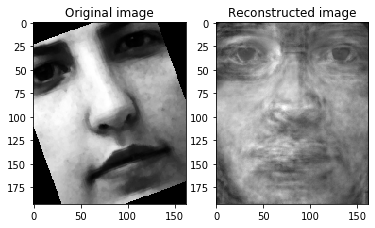

In [300]:
# ANGLE = 20 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,20,reshape=False)  #rotate the image by 20 degrees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 3045.2810973371993


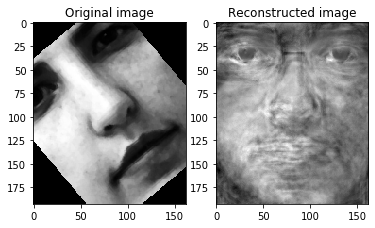

In [301]:
# ANGLE = 40 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,40,reshape=False)  #rotate by 40 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 2624.5489719703146


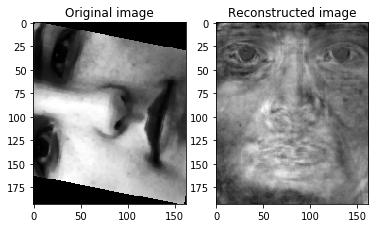

In [302]:
# ANGLE = 79 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,79,reshape=False)  #rotate by 79 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 3103.9412064880407


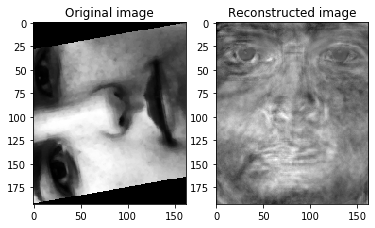

In [303]:
# ANGLE = 100 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,100,reshape=False)  #rotate by 100 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 2900.6114642517914


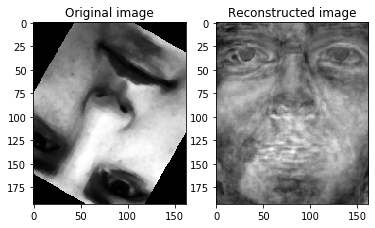

In [304]:
# ANGLE = 150 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,150,reshape=False)  #rotate by 150 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 3378.5588518383165


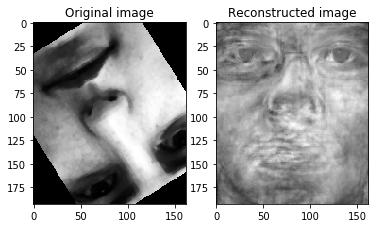

In [305]:
# ANGLE = 212 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,212,reshape=False)  #rotate by 212 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 3168.925362177334


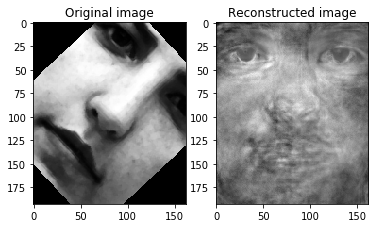

In [306]:
# ANGLE = 313 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,313,reshape=False)  #rotate by 313 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

MSE : 212.53662240426436


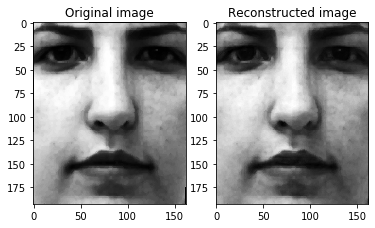

In [307]:
# ANGLE = 360 DEGRESS

img = mpimg.imread(dir_a[130])   #take one of the images from the neutral faces
imgr = scipy.ndimage.rotate(img,360,reshape=False)  #rotate by 360 degreees
rotatedimg = imgr.reshape(31266,1)  #reshape the image
rotatedimgavg = rotatedimg - imgavgA.reshape(31266,1)   #subtract the average of the image from this rotated image
eigenAvnormtA = np.transpose(eigenAvnormA)   #find the transpose of the normalised eigen vectors A.v
weightA = np.matmul(eigenAvnormtA,rotatedimgavg)   #multiply transpose of eigenvectors with the image from the car image with average subtracted from it

imgavgA1 = imgavgA.reshape(31266,1)  #reshape image average back to a column of N^2
reconA = (np.matmul(eigenAvnormA,weightA))+imgavgA1.reshape(31266,1)   #reconstruct image by multiplying the normalized eigenvectors A.v and the weights obtained for the image to be reconstructed
reconA = reconA.reshape(193,162)  #reshape the reconstructed car image to display it as NxN
print('MSE :' , mse(reconA,imgr)) #find the mean square error between the reconstructed and original image

    
y = reconA
z = imgr
    
fig, axs = plt.subplots(1,2)
   
axs[0].imshow(z, cmap='gray')
axs[0].set_title('Original image')
axs[1].imshow(y, cmap='gray')
axs[1].set_title('Reconstructed image')

### Observation from result 

1) We observe that the reconstruction obtained for angles 20, 40, 79,100, 150, 212, 313 is not clear.

2) However , the reconstruction obtained from keeping the angle 360 is resembling the original image. 

3) This is because, at various angles, due to the rotation , the projection on the face space while reconstruction is not clear. The images are tilted and do not make a close reconstruction possible .Hence, we observe high values of mean squared errors. There is almost no similarity between the original image and the reconstructed image.

4) Whereas , in case of 360 degress, the original image is the same as the image of the face. Hence, the reconstruction is proper and the value of the mean squared error is very low compared to the images at angles. The original and reconstructed images are almost similar.